In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

data = pd.read_csv('simple_linear_regression.csv')
data
data.describe()




,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


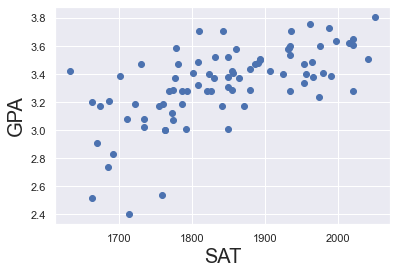

In [3]:
#let's define the dependent and the independent variable:
#y(hat)=b0+b1x1
y = data['GPA']
x1= data['SAT']
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize =20)
plt.ylabel('GPA', fontsize =20)
plt.show()




In [4]:
#regression mdl
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()
# OLS(Ordinary least squares, or linear least squares)
#  estimates the parameters in a regression model by minimizing 
# the sum of the squared residuals. This method draws a line through the 
# data points that minimizes the sum of the squared differences between 
# the observed values and the corresponding fitted values.)

C:\Users\Simin\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           7.20e-11
Time:                        12:41:29   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#b0=0.2750, b1=0.0017
#yhat=0.2750+0.0017x1
#or GPA = 0.2750+0.0017SAT



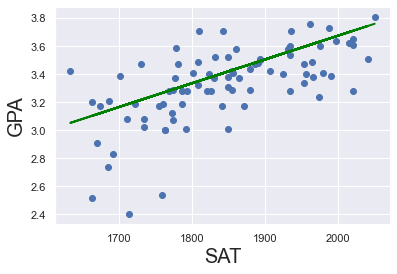

In [6]:
y = data['GPA']
x1= data['SAT']
yhat=0.2750+0.0017*x1
fig=plt.plot(x1,yhat, lw=2,c='green', label='regression line')
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize =20)
plt.ylabel('GPA', fontsize =20)
plt.show()

In [7]:
#cross validation
#K-fold

data.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [9]:
x=data['GPA']
y=data['SAT']

from sklearn.model_selection import KFold

kf=KFold(n_splits=5)

i=1
for train_set, test_set in kf.split(X=x):
    print("iteration:",i)
    print(train_set, len(train_set))
    print(test_set, len(test_set))
    i+=1




iteration: 1
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83] 67
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] 17
iteration: 2
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83] 67
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33] 17
iteration: 3
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83] 67
[34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50] 17
iteration: 4
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score
data_train, data_test = train_test_split(data, train_size=0.7, test_size=0.3,random_state=10)
x_train=data_train['GPA']
x_train = x_train.values.reshape(-1,1)
y_train=data_train['SAT']
y_train = y_train.values.reshape(-1,1)
x_test=data_test['GPA']
x_test = x_test.values.reshape(-1,1)
y_test=data_test['SAT']
y_test = y_test.values.reshape(-1,1)
model = LinearRegression()

scores = cross_val_score(model, x_train, y_train, scoring='r2', cv=5)
scores

array([ 0.24967872,  0.34872144,  0.51105228,  0.18803262, -0.12582889])

In [37]:

(scores.sum())/5

0.23433123378015203